In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv('kashti.csv')

# Missing completely at random

###  -No relationship between the data missing

In [3]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Missing data not at random(systematic missing values)

###  Relationship between data missing within the dataset

In [5]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#Cabin and age have relation between them
#Cabin has string values so we will convert that to 1 and 0
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

df['Cabin_null'].mean()

0.7822966507177034

In [7]:
df.groupby(['Survived'])['Cabin_null'].mean()
#82% missing data is of dead people
#71% of missing data is of alive person

Survived
0    0.823308
1    0.710526
Name: Cabin_null, dtype: float64

# Missing at random

### -Age of women
### -Salary of men

# All techniques of handling missing values

1.Mean

2.Median

3.Mode

4.Random sample inputation

5.Captuuring nan values with a new feature

6.Arbitrary imputation

7.Frequent catogries imputation


In [8]:
#Mean median mode imputation is used when there is no relation between data
df=pd.read_csv('kashti.csv',usecols=['Age','Cabin'])
df

,Age,Cabin
0,34.5,NaN
1,47.0,NaN
2,62.0,NaN
3,27.0,NaN
4,22.0,NaN
...,...,...
413,NaN,NaN
414,39.0,C105
415,38.5,NaN
416,NaN,NaN


In [9]:
df.isnull().mean()

Age      0.205742
Cabin    0.782297
dtype: float64

In [10]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Age'].median()

27.0

In [11]:
df['Age'].isnull().sum()

0

# Random sample imputation

## Aim:
### 1)It consist of taking random observation from the data set
### 2) We use this observation to replace NAN values
### 3) It is used when data is missing completely at random(No relation btw data)

### 4) Good in case when we have to apply linear algorithms


In [12]:
df=pd.read_csv('kashti.csv',usecols=['Age','Cabin'])
df

,Age,Cabin
0,34.5,NaN
1,47.0,NaN
2,62.0,NaN
3,27.0,NaN
4,22.0,NaN
...,...,...
413,NaN,NaN
414,39.0,C105
415,38.5,NaN
416,NaN,NaN


In [13]:
#Code for random sampe imputation
df['Cabin'][df['Cabin'].isnull()]= df['Cabin'].dropna().sample(df['Cabin'].isnull().sum(),replace=True,random_state=0).values


C:\Users\NAJEEB\AppData\Local\Temp\ipykernel_4312\1730312148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin'][df['Cabin'].isnull()]= df['Cabin'].dropna().sample(df['Cabin'].isnull().sum(),replace=True,random_state=0).values


In [14]:
df['Cabin'].head(10)

0        E34
1        B11
2        B69
3      F E57
4      F E57
5        D15
6        C31
7    C55 C57
8        D22
9        D38
Name: Cabin, dtype: object

In [15]:
df['Cabin'].isnull().sum()

0

# Capturing NaN values with a new feature

## Works well when data is not missing at random(There is relation btw data)

In [16]:
df=pd.read_csv('kashti.csv',usecols=['Age','Cabin',"Survived",'Fare'])
df.head()

,Survived,Age,Fare,Cabin
0,0,34.5,7.8292,NaN
1,1,47.0,7.0000,NaN
2,0,62.0,9.6875,NaN
3,0,27.0,8.6625,NaN
4,1,22.0,12.2875,NaN


In [17]:
df['Age_Nan']=np.where(df['Age'].isnull(),1,0)

In [18]:
df["Age"]=df['Age'].fillna(df['Age'].median())

In [19]:
df.head(50)

,Survived,Age,Fare,Cabin,Age_Nan
0,0,34.5,7.8292,NaN,0
1,1,47.0,7.0000,NaN,0
2,0,62.0,9.6875,NaN,0
3,0,27.0,8.6625,NaN,0
4,1,22.0,12.2875,NaN,0
5,0,14.0,9.2250,NaN,0
6,1,30.0,7.6292,NaN,0
7,0,26.0,29.0000,NaN,0
8,1,18.0,7.2292,NaN,0
9,0,21.0,24.1500,NaN,0


In [20]:
df["Age"].isnull().sum()

0

### Advantages:

1)Easy to implement

2)Captures the importance of missing values

### Disadvantages:

1)Creating additonal features

# End of distribution imputation

## Used for values for missing completely at random



In [21]:
df=pd.read_csv('kashti.csv',usecols=['Age',"Survived",'Fare'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


<AxesSubplot:>

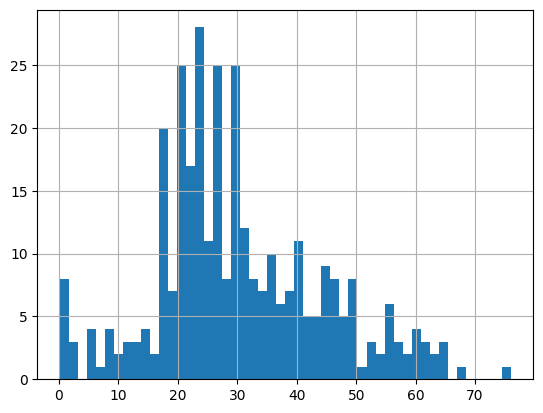

In [22]:
#We will try to take the value from far end of this distribution and replace that with nan values
df.Age.hist(bins=50)

In [23]:
# We will take the value after 3rd standard deviation
extreme=df['Age'].mean()+3*df['Age'].std()

C:\Users\NAJEEB\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

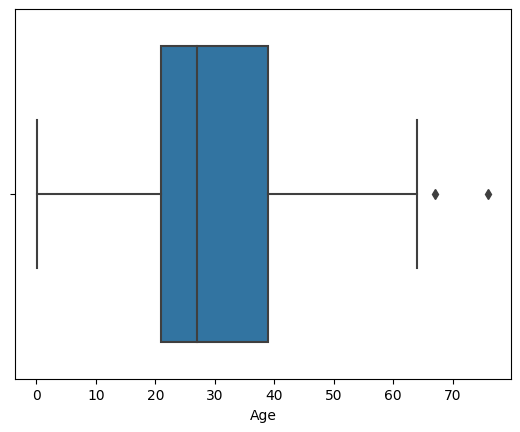

In [24]:
sns.boxplot('Age',data=df)

In [25]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_End_dist"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [26]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [27]:
df.head(50)

,Survived,Age,Fare,Age_End_dist
0,0,34.5,7.8292,34.500000
1,1,47.0,7.0000,47.000000
2,0,62.0,9.6875,62.000000
3,0,27.0,8.6625,27.000000
4,1,22.0,12.2875,22.000000
5,0,14.0,9.2250,14.000000
6,1,30.0,7.6292,30.000000
7,0,26.0,29.0000,26.000000
8,1,18.0,7.2292,18.000000
9,0,21.0,24.1500,21.000000


<AxesSubplot:>

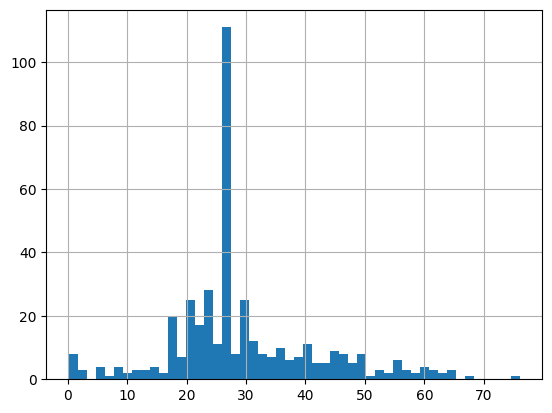

In [28]:
df['Age'].hist(bins=50)

<AxesSubplot:>

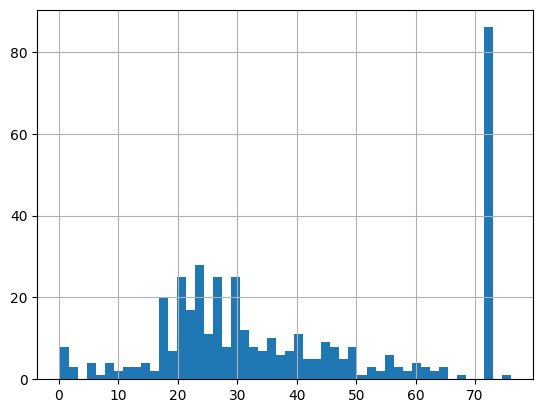

In [29]:
df['Age_End_dist'].hist(bins=50)

C:\Users\NAJEEB\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_End_dist'>

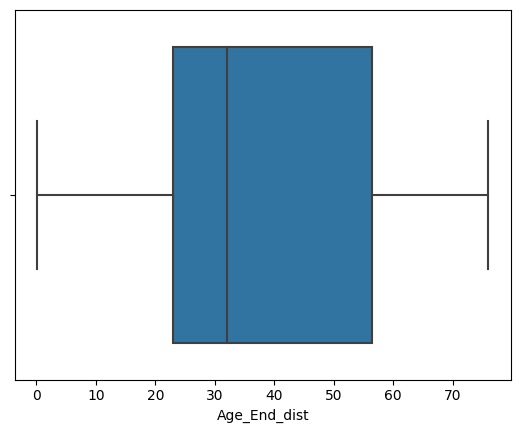

In [30]:
sns.boxplot(df['Age_End_dist'])

# Arbitrary number imputation

1)It consist of replacing nan values by an arbitrary value

2) Not frequently used

3) We can take the minimum or maximun value as an arbitrary value

In [31]:
df1=pd.read_csv('kashti.csv',usecols=['Age',"Survived",'Fare'])
df1.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [32]:
def impute_nan_arbitrary(df,variable):
    df[variable+"Least"]=df[variable].fillna(0)
    df[variable+'Highest']=df[variable].fillna(100)

In [33]:
impute_nan_arbitrary(df1,'Age')

In [34]:
df1.head(20)

,Survived,Age,Fare,AgeLeast,AgeHighest
0,0,34.5,7.8292,34.5,34.5
1,1,47.0,7.0000,47.0,47.0
2,0,62.0,9.6875,62.0,62.0
3,0,27.0,8.6625,27.0,27.0
4,1,22.0,12.2875,22.0,22.0
5,0,14.0,9.2250,14.0,14.0
6,1,30.0,7.6292,30.0,30.0
7,0,26.0,29.0000,26.0,26.0
8,1,18.0,7.2292,18.0,18.0
9,0,21.0,24.1500,21.0,21.0


In [35]:
df1['AgeLeast'].isnull().sum()

0

# Handling categorical features missing values


## Frequent category imputation

In [36]:
tr=pd.read_csv('train house prediction.csv')
tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
tr=pd.read_csv('train house prediction.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
tr.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [38]:
tr.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [39]:
tr.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:>

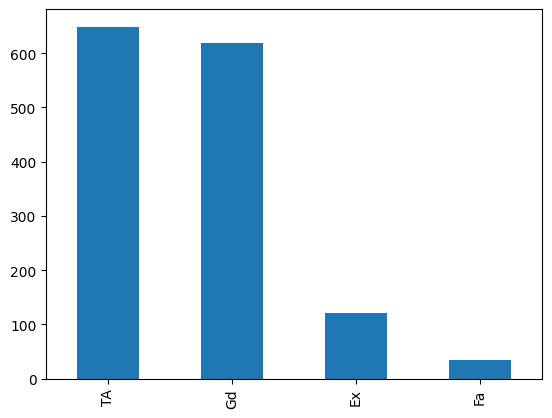

In [40]:
#BsmtQual
tr['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

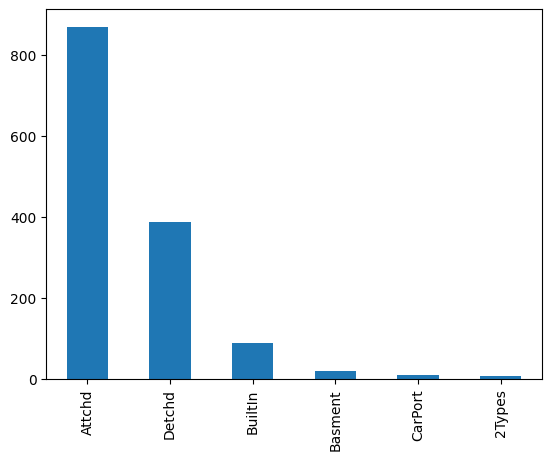

In [41]:
#GarageType
tr['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

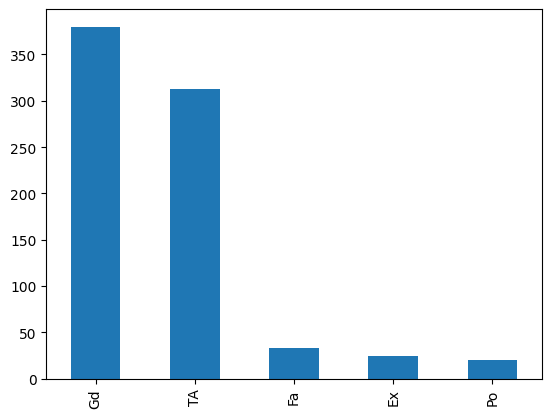

In [42]:
#FireplaceQu
tr['FireplaceQu'].value_counts().plot.bar()

In [43]:
#Let's create a function for it
def impute_nan_cat(tr,variable):
    most_frequent_value=tr[variable].value_counts().index[0]
    tr[variable].fillna(most_frequent_value,inplace=True)

In [44]:
impute_nan_cat(tr,'GarageType')

In [45]:
tr['GarageType'].isnull().sum()

0

In [46]:
#A super trick
for features in ['BsmtQual','FireplaceQu']:
    impute_nan_cat(tr,features)


In [47]:
tr.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

# Disadvantage

1)Should not be done we have higher missing values

2) Good approach when you have less no of missing values

# Adding a variable to capture NaN

In [48]:
tr=pd.read_csv('train house prediction.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
tr.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [49]:
tr.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [50]:
#Replace the null values by 1 
tr['BsmtQual_var']=np.where(tr['BsmtQual'].isnull(),1,0)

In [51]:
tr.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [52]:
#Imputing the nan values by most frequent category
impute_nan_cat(tr,'BsmtQual')

In [53]:
tr['BsmtQual'].isnull().sum()

0

# Most frequently used technique

## suppose if you have more frequent categories , we just replace nan with a new category

In [54]:
tr=pd.read_csv('train house prediction.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
tr.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [55]:
def impute_nan_new(tr,variable):
    tr[variable+"New"]=np.where(tr[variable].isnull(),"Missing",tr[variable])

In [56]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan_new(tr,features)


In [57]:
tr.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualNew,FireplaceQuNew,GarageTypeNew
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [58]:
tr=tr.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [61]:
tr.head()

,SalePrice,BsmtQualNew,FireplaceQuNew,GarageTypeNew
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
